
<img src ='Pic\logo_CNTT.png' width='400px'>
<div align="center">
<h2> MÔN HỌC: KHOA HỌC DỮ LIỆU (7080509) </h2>
</div>

---
<center>
<h1> CHƯƠNG 4: MỘT SỐ THƯ VIỆN QUAN TRỌNG CHO KHOA HỌC DỮ LIỆU - PHẦN 3 (PANDAS)</h1>
</center>

---

**NỘI DUNG BÀI HỌC:**
1. Giới thiệu Pandas
2. Tạo đối tượng cơ bản trong Pandas
    * Series
    * Dataframe
3. Đọc dữ liệu từ các nguồn khác nhau
4. Quan sát và truy xuất dữ liệu trong DataFrame 
5. Replacing Values, Rename Columns
6. Lọc dữ liệu trong DataFrame
7. Xác định các tham số thống kê: Sum, Cumsum, Min, Max, Mean, Median, Std
8. Giá trị duy nhất (Unique)

---
*Copyright: Đặng Văn Nam - FIT.HUMG - AIAcademy VN - BKACAD@2022*

# 1) Giới thiệu
---
**Pandas** là một thư viện mã nguồn mở được xây dựng dựa trên NumPy, sử dụng để thao tác và phân tích dữ liệu. Với Pandas chúng ta có thể:
Xử lý tập dữ liệu khác nhau về định dạng: chuỗi thời gian, bảng không đồng nhất, ma trận dữ liệu
* Import dữ liệu từ nhiều nguồn khác nhau như CSV, DB/SQL…
* Xử lý vô số phép toán cho tập dữ liệu: subsetting, slicing, filtering, merging, groupBy, re-ordering, and re-shaping,..
* Xử lý dữ liệu mất mát theo mong muốn.
* Xử lý, phân tích dữ liệu tốt như mô hình hoá và thống kê.
* Tích hợp tốt với các thư viện khác của python.

https://pandas.pydata.org/

In [1]:
#Kiểm tra phiên bản của thư viện Pandas
import pandas as pd
print('Version Pandas: ',pd.__version__)

Version Pandas:  1.4.2


# 2) Làm việc với các đối tượng trong Pandas
---
## 2.1) Series

**Series** là mảng một chiều (1D) giống như kiểu vector trong Numpy, hay như một cột của một bảng, nhưng nó bao gồm thêm một bảng đánh index.

In [13]:
#Khai báo sử dụng thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Tạo một đối tượng series
#index mặc định đánh số từ 0
data = pd.Series([2.8, 3, 4.44, 5])
data

0    2.80
1    3.00
2    4.44
3    5.00
dtype: float64

In [3]:
type(data)

pandas.core.series.Series

In [4]:
data_name = pd.Series(['Hoa','Hằng','Hải','Trung','Kiên'], name = 'Student')
data_name

0      Hoa
1     Hằng
2      Hải
3    Trung
4     Kiên
Name: Student, dtype: object

In [5]:
#Mỗi một đối tượng series bao gồm 2 thành phần
#1. Values
#2. index
print('Values:', data.values)
print('Indices:', data.index)

Values: [2.8  3.   4.44 5.  ]
Indices: RangeIndex(start=0, stop=4, step=1)


In [6]:
#Tạo một đối tượng series với index thiết lập
data = pd.Series([1.25, 2, 3.5, 4.75, 8.0],
                 index=['a', 'b', 'c', 'd','k'])
data

a    1.25
b    2.00
c    3.50
d    4.75
k    8.00
dtype: float64

In [7]:
print('Values:', data.values)
print('Indices:', data.index)

Values: [1.25 2.   3.5  4.75 8.  ]
Indices: Index(['a', 'b', 'c', 'd', 'k'], dtype='object')


In [8]:
#Truy cập tới một phần tử trong series thông qua index hoặc thứ tự
print('Phần tử có index = b:', data['b'])
print('Phần tử ở vị trí 1  :', data[1])

Phần tử có index = b: 2.0
Phần tử ở vị trí 1  : 2.0


In [9]:
#Tạo đối tượng series từ một biến kiểu Dictionary
#Chỉ số được tự động sắp xếp.
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict,name='Population_USA')
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Population_USA, dtype: int64

In [10]:
#View tên của series
population.name

'Population_USA'

In [11]:
population['Florida']

19552860

In [14]:
#Chuyển đổi từ dữ liệu vector sang series
a_vector = np.array([8,12,9,0,7,11])

a_series = pd.Series(a_vector,dtype='float')
a_series

0     8.0
1    12.0
2     9.0
3     0.0
4     7.0
5    11.0
dtype: float64

## 2.2) DataFrame
---

In [15]:
#Tạo DataFrame từ các Series
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995}
area = pd.Series(area_dict, name='Area_USA')
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area_USA, dtype: int64

In [16]:
data_usa = pd.DataFrame({'population':population,
                         'area':area})
data_usa

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [18]:
type(data_usa)

pandas.core.frame.DataFrame

In [17]:
#Tương tự như series, DataFrame cũng có thuộc tính values và index
df_values = data_usa.values
df_index = data_usa.index
print('Values of DataFrame:\n',df_values)
print('Index of DataFrame:\n',df_index)

Values of DataFrame:
 [[38332521   423967]
 [26448193   695662]
 [19651127   141297]
 [19552860   170312]
 [12882135   149995]]
Index of DataFrame:
 Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')


In [19]:
type(df_values)

numpy.ndarray

In [20]:
#Tạo một DataFrame từ một biến Dict
#Chỉ số được tạo mặc định từ 0
data_dict = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]}

purchases = pd.DataFrame(data_dict)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [21]:
#Tạo DataFrame với index thiết lập
purchases = pd.DataFrame(data_dict, 
                         index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


# 3) Đọc dữ liệu từ các nguồn khác nhau (CSV, Text, Excel)
---
## 3.1) Đọc file CSV, Text
* CSV là một định dạng dữ liệu văn bản đơn giản có tên đầy đủ là Comma Separated Values. Với định dạng CSV này, các giá trị được chia tách với nhau bởi các dấu phẩy. Định dạng CSV phổ biến bởi vì chúng có tính tương thích cao, dễ dàng di chuyển từ phần mềm này sang phần mềm khác để sử dụng mà không lo gặp các xung đột.

* Tài liệu CSV cũng làm một trong những tài liệu phổ biến trên thế giới với khả năng lưu trữ nhỏ nhẹ.


In [22]:
import pandas as pd
path = 'Data/csv_Data_BMI.csv'

#Sử dụng phương thức read_csv
data = pd.read_csv(path)

#Hiển thị thông tin biến Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Personal   500 non-null    object
 1   Gender     500 non-null    object
 2   Height_cm  500 non-null    int64 
 3   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [26]:
#Hiển thị những dòng dữ liệu đầu tiên:
data.head(7)

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
2,P3,Female,185,110
3,P4,Female,195,104
4,P5,Male,149,61
5,P6,Male,189,104
6,P7,Male,147,92


In [28]:
#Hiển thị 5 dòng dữ liệu cuối cùng:
data.tail()

,Personal,Gender,Height_cm,Weight_kg
495,P496,Female,150,153
496,P497,Female,184,121
497,P498,Female,141,136
498,P499,Male,150,95
499,P500,Male,173,131


In [25]:
#VÍ DỤ 1:
#Sử dụng phương thức read_csv()
#Tham số: Thiết lập cột index là cột Personal
data1 = pd.read_csv(path,
                    index_col=0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, P1 to P500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     500 non-null    object
 1   Height_cm  500 non-null    int64 
 2   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [ ]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
data1.head()

In [ ]:
#VÍ DỤ 2:
#Sử dụng phương thức read_csv()
#Thiết lập số hàng, cột muốn đọc dữ liệu
data2 = pd.read_csv(path,
                    nrows=100,
                    usecols=['Height_cm', 'Weight_kg'])
data2.info()

In [ ]:
data2.tail()

In [ ]:
#VÍ DỤ 3:
#Thiết lập tham số đọc dữ liệu từ dòng thứ 5 trong file
#và đặt lại tên của các cột dữ liệu
data3 = pd.read_csv(path,
                    names=['ID','Sex','H(cm)','W(kg)'],
                    skiprows=5)
data3.info()

In [ ]:
data3.head()

#### Đọc dữ liệu từ file Text
---

In [43]:
#Đọc dữ liệu từ file txt mặc định
df_diem = pd.read_csv('Data/txt_Data_Diem_2A.txt',header = None)
df_diem

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,4,3,7,5,6,5,6,8,9,3,6,1,9,8,7,3,3,9,5
1,3,5,3,10,9,1,9,8,3,1,6,0,7,10,8,5,2,7,7,1
2,1,10,4,9,6,9,0,2,3,1,8,6,8,4,2,9,2,9,5,0
3,6,3,0,8,3,7,7,2,6,8,7,3,4,1,5,9,1,0,2,10
4,4,3,6,7,4,5,2,6,9,4,3,9,9,4,5,7,2,10,9,4
5,2,3,8,10,4,5,9,5,4,7,10,1,8,4,3,9,6,3,6,7
6,9,9,1,10,9,9,5,9,6,3,9,5,1,10,7,10,2,8,8,1
7,8,8,7,8,6,7,7,8,6,7,8,6,7,6,8,8,7,6,8,8
8,6,7,8,9,10,9,2,2,6,1,10,9,6,3,9,5,9,8,1,1
9,7,8,7,8,6,10,10,6,8,10,8,9,8,8,5,10,8,7,8,7


In [44]:
df_diem2a = pd.read_csv('Data/txt_Data_Diem_2A.txt',header=None)
df_diem2a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,4,3,7,5,6,5,6,8,9,3,6,1,9,8,7,3,3,9,5
1,3,5,3,10,9,1,9,8,3,1,6,0,7,10,8,5,2,7,7,1
2,1,10,4,9,6,9,0,2,3,1,8,6,8,4,2,9,2,9,5,0
3,6,3,0,8,3,7,7,2,6,8,7,3,4,1,5,9,1,0,2,10
4,4,3,6,7,4,5,2,6,9,4,3,9,9,4,5,7,2,10,9,4
5,2,3,8,10,4,5,9,5,4,7,10,1,8,4,3,9,6,3,6,7
6,9,9,1,10,9,9,5,9,6,3,9,5,1,10,7,10,2,8,8,1
7,8,8,7,8,6,7,7,8,6,7,8,6,7,6,8,8,7,6,8,8
8,6,7,8,9,10,9,2,2,6,1,10,9,6,3,9,5,9,8,1,1
9,7,8,7,8,6,10,10,6,8,10,8,9,8,8,5,10,8,7,8,7


In [29]:
#Đọc dữ liệu trong file txt_Diem_2A.txt:
df_diem2a = pd.read_csv('Data/txt_Data_Diem_2A.txt',
                     names=['HS1','HS2','HS3','HS4','HS5','HS6','HS7','HS8','HS9','HS10',
                            'HS11','HS12','HS13','HS14','HS15','HS16','HS17','HS18','HS19','HS20'],
                     header=None)
                    
df_diem2a

,HS1,HS2,HS3,HS4,HS5,HS6,HS7,HS8,HS9,HS10,HS11,HS12,HS13,HS14,HS15,HS16,HS17,HS18,HS19,HS20
0,2,4,3,7,5,6,5,6,8,9,3,6,1,9,8,7,3,3,9,5
1,3,5,3,10,9,1,9,8,3,1,6,0,7,10,8,5,2,7,7,1
2,1,10,4,9,6,9,0,2,3,1,8,6,8,4,2,9,2,9,5,0
3,6,3,0,8,3,7,7,2,6,8,7,3,4,1,5,9,1,0,2,10
4,4,3,6,7,4,5,2,6,9,4,3,9,9,4,5,7,2,10,9,4
5,2,3,8,10,4,5,9,5,4,7,10,1,8,4,3,9,6,3,6,7
6,9,9,1,10,9,9,5,9,6,3,9,5,1,10,7,10,2,8,8,1
7,8,8,7,8,6,7,7,8,6,7,8,6,7,6,8,8,7,6,8,8
8,6,7,8,9,10,9,2,2,6,1,10,9,6,3,9,5,9,8,1,1
9,7,8,7,8,6,10,10,6,8,10,8,9,8,8,5,10,8,7,8,7


In [30]:
#Đọc dữ liệu trong file txt_Data_Diamonds.txt:
df_Diamonds = pd.read_csv('Data/txt_Data_Diamonds.txt',
                     names=['Weight(carat)','Price(USD)'],
                     sep='\t', #mặc định sep=','
                     header=None)
                    
df_Diamonds

,Weight(carat),Price(USD)
0,0.23,484
1,0.31,942
2,0.20,345
3,1.02,4459
4,1.63,14022
5,1.14,4212
6,2.01,11925
7,1.28,9548
8,1.70,11605
9,1.01,4642


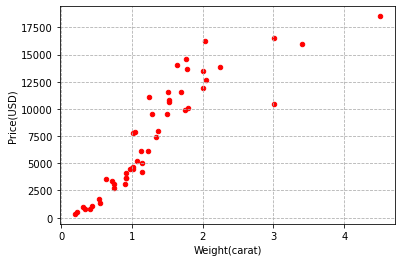

In [31]:
#Trực quan hóa dữ liệu:
import matplotlib.pyplot as plt
df_Diamonds.plot.scatter(x='Weight(carat)',y='Price(USD)',color='red')
plt.grid(True,ls='--')
plt.show()

## THỰC HÀNH SỐ 1
---
**Yêu cầu 1.1: Học viên đọc dữ liệu dạng CSV lưu trong file csv_Data_Loan.csv với các tham số mặc định, cho biết các thông tin cơ bản của file**

In [35]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}
path_loan = 'Data/csv_Data_Loan.csv'
df_Loan = pd.read_csv(path_loan)

df_Loan.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113680 entries, 0 to 113679
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       113680 non-null  int64  
 1   term            113680 non-null  object 
 2   int_rate        113680 non-null  float64
 3   home_ownership  113680 non-null  object 
 4   annual_inc      113676 non-null  float64
 5   purpose         113680 non-null  object 
 6   addr_state      113680 non-null  object 
 7   bad_loan        113680 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [36]:
df_Loan.head()

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
1,2500,60 months,15.27,RENT,30000.0,car,GA,1
2,2400,36 months,15.96,RENT,12252.0,small_business,IL,0
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
4,5000,36 months,7.90,RENT,36000.0,wedding,AZ,0


In [37]:
df_Loan.tail()

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
113675,15000,60 months,12.39,MORTGAGE,45000.0,credit_card,OK,0
113676,20000,36 months,14.99,OWN,80000.0,home_improvement,VA,0
113677,12825,36 months,17.14,MORTGAGE,38000.0,debt_consolidation,TX,0
113678,27650,60 months,21.99,RENT,60000.0,credit_card,NY,0
113679,17000,60 months,15.99,MORTGAGE,63078.0,debt_consolidation,PA,0


**Yêu cầu 1.2: Đọc dữ liệu từ file Data_Loan.CSV vào 2 biến DataFrame tương ứng**
1. df_number: Chỉ chứa các cột dữ liệu số
2. df_object: Chỉ chứa các cột dữ liệu Object

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}

path_loan = 'Data/csv_Data_Loan.csv'
df_Loan = pd.read_csv(path_loan)

df_Loan.info() 



**Yêu cầu 1.3: Đọc dữ liệu nhiệt độ của 6 thành phố [Hà Nội, Vinh, Đà Nẵng, Nha Trang, TP Hồ Chí Minh, Cà Mau] từ file txt_Data_Temp.txt vào biến DataFrame tương ứng**


In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







## 3.2) Đọc file Excel
---

In [76]:
path_excel = 'Data/excel_Data_Point.xlsx'
df_class1 = pd.read_excel(path_excel,
                          sheet_name = '4080130_01') #Đọc sheet nao

df_class1.head(10)

,STT,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
0,1,1621050322,Phạm Trường,An,04/10/1998,DCCTPM61_1,8.0,0.0,5.0,7.5,8.0
1,2,1621050512,Nguyễn Quang Duy,Anh,08/10/1998,DCCTPM61_1,6.0,3.0,7.5,8.5,9.0
2,3,1621050211,Nguyễn Thế,Anh,26/08/1998,DCCTPM61_1,6.7,4.0,6.5,3.0,5.0
3,4,1621050827,Đỗ Xuân,Bách,13/07/1998,DCCTPM61_1,8.0,6.5,8.0,10.0,9.0
4,5,1621050298,Dương Trí,Bách,25/09/1998,DCCTPM61_1,7.0,5.0,8.0,8.5,9.0
5,6,1621050351,Nguyễn Văn,Bắc,04/02/1998,DCCTPM61_1,4.3,5.0,5.0,6.0,6.0
6,7,1621050422,Phạm Tiến,Cảnh,20/03/1998,DCCTPM61_1,7.0,6.5,9.0,10.0,10.0
7,8,1621050281,Trần Minh,Chiến,02/03/1998,DCCTPM61_1,5.3,3.5,6.0,8.5,8.0
8,9,1621050753,Vũ Trung,Chiến,22/01/1998,DCCTPM61_1,6.0,5.0,6.5,10.0,10.0
9,10,1621050283,Tạ Xuân,Công,21/08/1997,DCCTPM61_1,6.0,5.5,7.0,8.5,8.0


In [81]:

path_excel = 'Data/excel_Data_Point.xlsx'
df_class2 = pd.read_excel(path_excel,
                          sheet_name = '4080130_02',
                         skiprows = 9) #Đọc sheet nao

df_class2.head(10)

,STT,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
0,1,1621050193,Đặng Đình,An,15/02/1998,DCCTPM61_1,7.0,6.5,7.5,7.0,8.0
1,2,1621070195,Mai Việt,Anh,01/09/1998,DCCTPM62A,8.0,6.5,6.0,5.0,6.0
2,3,1721050524,Nguyễn Thị,Anh,18/05/1999,DCCTPM62A,7.7,6.0,7.5,8.5,9.0
3,4,1621050484,Phạm Tuấn,Anh,27/10/1998,DCCTPM61_1,6.3,3.0,5.0,0.0,5.0
4,5,1621050260,Phan Tuấn,Anh,20/05/1998,DCCTPM61_1,7.7,6.5,7.0,10.0,9.0
5,6,1621050714,Bùi Văn,Ánh,13/07/1998,DCCTPM61_1,9.0,1.5,8.0,8.0,9.0
6,7,1621050152,Đặng Thị,Biên,24/04/1998,DCCTPM61_1,6.7,6.0,9.0,10.0,10.0
7,8,1621050834,Ngô Thị Mai,Chi,09/12/1998,DCCTPM61_1,6.0,4.0,8.0,9.0,8.0
8,9,1621050071,Nguyễn Đình,Chiến,26/10/1998,DCCTPM61_1,7.0,6.0,7.0,10.0,10.0
9,10,1621050188,Nguyễn Văn,Chuẩn,28/04/1998,DCCTPM61_1,6.7,1.5,9.0,8.5,9.0


In [82]:
path_excel = 'Data/excel_Data_Point.xlsx'
df_class3 = pd.read_excel(path_excel,
                          sheet_name = '4080130_03',
                          names = list(df_class2.columns),
                          header = None) #Đọc sheet nao

df_class3.head(10)

,STT,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
0,1,1621050041,Đào Tuấn,Anh,22/10/1998,DCCTPM61_1,6.7,9.0,5.5,8.5,8.0
1,2,1621050262,Vũ Thị Lan,Anh,26/09/1998,DCCTPM61_1,6.7,7.0,9.0,8.5,6.0
2,3,1621050083,Trịnh Như,Bình,06/04/1998,DCCTPM61_1,7.3,8.5,9.5,10.0,9.0
3,4,1621050113,Trần Văn,Cương,19/06/1998,DCCTPM61_1,5.7,5.0,6.0,10.0,5.0
4,5,1621050384,Nguyễn Sỹ,Dũng,02/10/1998,DCCTPM61_1,7.0,0.0,7.5,8.5,9.0
5,6,1721050001,Trần Thị Mỹ,Duyên,15/04/1999,DCCTPM62D,6.7,7.0,7.0,10.0,9.0
6,7,1621050291,Dương Hữu,Đức,16/06/1998,DCCTPM61_1,6.3,7.5,8.0,10.0,10.0
7,8,1621050252,Trương Thành,Đức,27/09/1998,DCCTPM61_1,7.7,8.0,8.0,10.0,8.0
8,9,1521020083,Tạ Văn,Được,20/08/1996,DCCTPM60_1,7.0,6.0,7.0,8.5,10.0
9,10,1621050156,Vũ Anh,Hà,12/10/1998,DCCTPM61_1,6.7,5.0,7.0,8.5,9.0


In [83]:
#Tổng hợp bảng điểm từ nhiều biến DataFrame thành một biến
df_all = pd.concat([df_class1,df_class2,df_class3])
df_all

,STT,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
0,1,1621050322,Phạm Trường,An,04/10/1998,DCCTPM61_1,8.0,0.0,5.0,7.5,8.0
1,2,1621050512,Nguyễn Quang Duy,Anh,08/10/1998,DCCTPM61_1,6.0,3.0,7.5,8.5,9.0
2,3,1621050211,Nguyễn Thế,Anh,26/08/1998,DCCTPM61_1,6.7,4.0,6.5,3.0,5.0
3,4,1621050827,Đỗ Xuân,Bách,13/07/1998,DCCTPM61_1,8.0,6.5,8.0,10.0,9.0
4,5,1621050298,Dương Trí,Bách,25/09/1998,DCCTPM61_1,7.0,5.0,8.0,8.5,9.0
...,...,...,...,...,...,...,...,...,...,...,...
34,35,1721050290,Nguyễn Hoài,Thương,15/01/1999,DCCTPM62A,7.0,8.0,8.0,10.0,9.0
35,36,1621050162,Kiều Xuân,Toản,05/11/1998,DCCTPM61_1,6.3,7.0,8.5,10.0,9.0
36,37,1721050199,Nguyễn Thu,Trang,14/11/1999,DCCTPM62C,6.3,0.0,7.5,10.0,6.0
37,38,1621050308,Hoàng Đặng Anh,Tú,15/08/1998,DCCTPM61_1,0.0,5.0,0.0,10.0,9.0


In [84]:
df_new = df_all.reset_index(drop = True)

In [85]:
#Thực hiện reset chỉ số của DataFrame
df_all.reset_index(drop = True,
                  inplace = True) # Áp dụng cho DataFrame hiện tại

In [86]:
#Hiển thị lại dữ liệu
df_all

,STT,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
0,1,1621050322,Phạm Trường,An,04/10/1998,DCCTPM61_1,8.0,0.0,5.0,7.5,8.0
1,2,1621050512,Nguyễn Quang Duy,Anh,08/10/1998,DCCTPM61_1,6.0,3.0,7.5,8.5,9.0
2,3,1621050211,Nguyễn Thế,Anh,26/08/1998,DCCTPM61_1,6.7,4.0,6.5,3.0,5.0
3,4,1621050827,Đỗ Xuân,Bách,13/07/1998,DCCTPM61_1,8.0,6.5,8.0,10.0,9.0
4,5,1621050298,Dương Trí,Bách,25/09/1998,DCCTPM61_1,7.0,5.0,8.0,8.5,9.0
...,...,...,...,...,...,...,...,...,...,...,...
139,35,1721050290,Nguyễn Hoài,Thương,15/01/1999,DCCTPM62A,7.0,8.0,8.0,10.0,9.0
140,36,1621050162,Kiều Xuân,Toản,05/11/1998,DCCTPM61_1,6.3,7.0,8.5,10.0,9.0
141,37,1721050199,Nguyễn Thu,Trang,14/11/1999,DCCTPM62C,6.3,0.0,7.5,10.0,6.0
142,38,1621050308,Hoàng Đặng Anh,Tú,15/08/1998,DCCTPM61_1,0.0,5.0,0.0,10.0,9.0


In [87]:
#Lưu dữ liệu ra file excel
df_all.to_excel('Diem_All.xlsx')

In [89]:
#Lưu dữ liệu ra file csv
df_all.to_csv('Diem_All.csv')

In [ ]:
import pandas as pd
path_excel = 'Data/excel_Data_Point.xlsx'

#Đọc dữ liệu từ file excel với các tham số mặc định:
data_ex = pd.read_excel(path_excel)
data_ex.info()

In [ ]:
data_ex

In [ ]:
#VÍ DỤ 1:
#Đọc dữ liệu tại sheet đầu tiên, 
#Chỉ lấy dữ liệu cột Mã SV và các cột điểm 
#Thiết lập cột đầu tiên làm index
data_ex1 = pd.read_excel(path_excel,
                        sheet_name='4080130_01',
                        usecols=[1,6,7,8,9,10],
                        index_col=0)
data_ex1.info()

In [ ]:
data_ex1.head()

In [ ]:
#VÍ DỤ 2:
#Đọc dữ liệu tại sheet 2, 
#Trường hợp: sử dụng các tham số mặc định
data_ex2 = pd.read_excel(path_excel,
                        sheet_name=1)
data_ex2.info()

In [ ]:
data_ex2.head(10)

In [ ]:
#VÍ DỤ 3:
#Đọc dữ liệu tại sheet '4080130_02',từ dòng 9
data_ex3 = pd.read_excel(path_excel,
                         sheet_name='4080130_02',
                         skiprows=9)
data_ex3.info()

In [ ]:
data_ex3.head()

In [ ]:
#VÍ DỤ 4
#Đọc dữ liệu từ sheet: '4080130_03'
#Dữ liệu không chứa dòng header
data_ex4 = pd.read_excel(path_excel,
                         sheet_name=2,
                         header=None)
data_ex4.head()

In [ ]:
data_ex4.head()

## THỰC HÀNH 3.2
--- 
Yêu cầu: Học viên đọc dữ liệu dạng excel lưu trong file excel_Data_Movies.xls theo từng sheet

In [ ]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}






# 4) Quan sát và truy suất dữ liệu từ DataFrame
---
## 4.1) Quan sát dữ liệu

In [90]:
#Đọc dữ liệu mẫu được lưu trữ trong file csv
path='Data/csv_Data_Loan.csv'
df_loan=pd.read_csv(path)
df_loan

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
1,2500,60 months,15.27,RENT,30000.0,car,GA,1
2,2400,36 months,15.96,RENT,12252.0,small_business,IL,0
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
4,5000,36 months,7.90,RENT,36000.0,wedding,AZ,0
...,...,...,...,...,...,...,...,...
113675,15000,60 months,12.39,MORTGAGE,45000.0,credit_card,OK,0
113676,20000,36 months,14.99,OWN,80000.0,home_improvement,VA,0
113677,12825,36 months,17.14,MORTGAGE,38000.0,debt_consolidation,TX,0
113678,27650,60 months,21.99,RENT,60000.0,credit_card,NY,0


In [91]:
#Quan sát dữ liệu biến DataFrame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113680 entries, 0 to 113679
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       113680 non-null  int64  
 1   term            113680 non-null  object 
 2   int_rate        113680 non-null  float64
 3   home_ownership  113680 non-null  object 
 4   annual_inc      113676 non-null  float64
 5   purpose         113680 non-null  object 
 6   addr_state      113680 non-null  object 
 7   bad_loan        113680 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [92]:
#Hiển thị 5 dòng đầu tiên
df_loan.head(5)

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
1,2500,60 months,15.27,RENT,30000.0,car,GA,1
2,2400,36 months,15.96,RENT,12252.0,small_business,IL,0
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
4,5000,36 months,7.90,RENT,36000.0,wedding,AZ,0


In [93]:
#Hiển thị 5 dòng cuối cùng của biến df_loan
df_loan.tail()

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
113675,15000,60 months,12.39,MORTGAGE,45000.0,credit_card,OK,0
113676,20000,36 months,14.99,OWN,80000.0,home_improvement,VA,0
113677,12825,36 months,17.14,MORTGAGE,38000.0,debt_consolidation,TX,0
113678,27650,60 months,21.99,RENT,60000.0,credit_card,NY,0
113679,17000,60 months,15.99,MORTGAGE,63078.0,debt_consolidation,PA,0


In [94]:
#Hiển thị kích thước df_loan (rows x columns)
df_loan.shape

(113680, 8)

In [95]:
#Danh sách tên các columns trong df
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'home_ownership', 'annual_inc',
       'purpose', 'addr_state', 'bad_loan'],
      dtype='object')

In [96]:
#Kiếm tra giá trị null trong Df
df_loan.isnull()

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
113675,False,False,False,False,False,False,False,False
113676,False,False,False,False,False,False,False,False
113677,False,False,False,False,False,False,False,False
113678,False,False,False,False,False,False,False,False


In [97]:
#Thống kê số lượng null theo cột
df_loan.isnull().sum()

loan_amnt         0
term              0
int_rate          0
home_ownership    0
annual_inc        4
purpose           0
addr_state        0
bad_loan          0
dtype: int64

In [98]:
#Cho biết số dòng dữ liệu không null
df_loan.count()

loan_amnt         113680
term              113680
int_rate          113680
home_ownership    113680
annual_inc        113676
purpose           113680
addr_state        113680
bad_loan          113680
dtype: int64

In [ ]:
#Số phần tử trong df (= rows x columns)
df_loan.size

In [ ]:
#Kiểu dữ liệu của từng columns trong df
df_loan.dtypes

In [99]:
#Quan sát một số đặc trưng thống kê của df
#Mặc định thống kê các cột dữ liệu số
df_loan.describe()

,loan_amnt,int_rate,annual_inc,bad_loan
count,113680.000000,113680.000000,1.136760e+05,113680.000000
mean,12876.102217,13.682683,7.137772e+04,0.192505
std,7898.511315,4.365731,6.183587e+04,0.394269
min,500.000000,5.420000,1.896000e+03,0.000000
25%,7000.000000,10.640000,4.400000e+04,0.000000
50%,11000.000000,13.480000,6.000000e+04,0.000000
75%,18000.000000,16.290000,8.500000e+04,0.000000
max,35000.000000,26.060000,7.141778e+06,1.000000


In [100]:
#Quan sát một số đặc trưng thống kê của df
#Thống kê các cột dữ liệu Object
df_loan.describe(include='O')

,term,home_ownership,purpose,addr_state
count,113680,113680,113680,113680
unique,2,5,14,50
top,36 months,MORTGAGE,debt_consolidation,CA
freq,90501,55491,63584,19984


In [103]:
df_loan['home_ownership'].value_counts()

MORTGAGE    55491
RENT        49029
OWN          8974
OTHER         156
NONE           30
Name: home_ownership, dtype: int64

In [ ]:
#Thống kê tất cả các cột dữ liệu ko phân biệt số, object
df_loan.describe(include='all')

In [ ]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu số
df_loan[['loan_amnt']].describe()

In [ ]:
#Quan sát đặc trưng thống kê theo từng cột
#Dữ liệu Object
df_loan[['term']].describe()

## 4.2) Truy xuất dữ liệu trong DataFrame
---

In [12]:
#gọi các thư viện sử dụng

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
path_loan = 'Data/csv_Data_Loan.csv'
df_loan = pd.read_csv(path_loan)

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113680 entries, 0 to 113679
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       113680 non-null  int64  
 1   term            113680 non-null  object 
 2   int_rate        113680 non-null  float64
 3   home_ownership  113680 non-null  object 
 4   annual_inc      113676 non-null  float64
 5   purpose         113680 non-null  object 
 6   addr_state      113680 non-null  object 
 7   bad_loan        113680 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


In [11]:
#Hiển thị dữ liệu:
df_loan.head()

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
1,2500,60 months,15.27,RENT,30000.0,car,GA,1
2,2400,36 months,15.96,RENT,12252.0,small_business,IL,0
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
4,5000,36 months,7.90,RENT,36000.0,wedding,AZ,0


In [16]:
#Truy xuất dữ liệu theo cột
#Lấy dữ liệu của một cột
df_state = df_loan[['addr_state']]
df_state.head()

,addr_state
0,AZ
1,GA
2,IL
3,CA
4,AZ


In [ ]:
#Truy xuất dữ liệu theo cột
#Chỉ lấy dữ liệu của 3 cột: loan_amnt, int_rate, purpose
df_loan1 = df_loan[['loan_amnt','int_rate','purpose']]
df_loan1.head()

#### df.iloc[[index_row],[index_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, index_col (tương tự như với Numpy)

In [17]:
#Sử dụng .iloc truy xuất dữ liệu như với Numpy
#Truy xuất 10 dòng dữ liệu từ [10 --> 20) tất cả các cột --- index = 0
df_loan.iloc[10:20,2:5]

,int_rate,home_ownership,annual_inc
10,13.49,RENT,30000.00
11,9.91,RENT,15000.00
12,10.65,RENT,100000.00
13,16.29,RENT,28000.00
14,15.27,RENT,42000.00
15,6.03,MORTGAGE,110000.00
16,11.71,MORTGAGE,84000.00
17,6.03,RENT,77385.19
18,12.42,RENT,105000.00
19,11.71,OWN,50000.00


In [18]:
#Truy xuất 100 dòng dữ liệu đầu tiên,
#của các cột có index 0, 6, 7
df_loan.iloc[:100,[0,6,7]]

,loan_amnt,addr_state,bad_loan
0,5000,AZ,0
1,2500,GA,1
2,2400,IL,0
3,10000,CA,0
4,5000,AZ,0
...,...,...,...
95,24000,CA,0
96,6000,CA,0
97,6000,AZ,0
98,2100,LA,0


In [19]:
df_loan.iloc[:10,:]

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
1,2500,60 months,15.27,RENT,30000.0,car,GA,1
2,2400,36 months,15.96,RENT,12252.0,small_business,IL,0
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
4,5000,36 months,7.90,RENT,36000.0,wedding,AZ,0
5,3000,36 months,18.64,RENT,48000.0,car,CA,0
6,5600,60 months,21.28,OWN,40000.0,small_business,CA,1
7,5375,60 months,12.69,RENT,15000.0,other,TX,1
8,6500,60 months,14.65,OWN,72000.0,debt_consolidation,AZ,0
9,12000,36 months,12.69,OWN,75000.0,debt_consolidation,CA,0


In [20]:
#Lấy các bản ghi ở hàng 0, 5, 10, 15, 20 + tất cả các cột:
df_new = df_loan.iloc[[0, 5, 10, 15, 20],:]
df_new

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
5,3000,36 months,18.64,RENT,48000.0,car,CA,0
10,9000,36 months,13.49,RENT,30000.0,debt_consolidation,VA,1
15,3600,36 months,6.03,MORTGAGE,110000.0,major_purchase,CT,0
20,10000,36 months,11.71,RENT,50000.0,debt_consolidation,CA,0


In [21]:
#Truy cập dòng dữ liệu 4, cột 0
df_loan.iloc[4,0]

5000

In [22]:
#Truy cập dòng dữ liệu 10, dòng 7
#Cột dữ liệu 0, 1, 5
df_loan.iloc[[10,7],[0,1,5]]

,loan_amnt,term,purpose
10,9000,36 months,debt_consolidation
7,5375,60 months,other


#### df.loc[[index_row],[name_col]]: Truy cập tới dữ liệu của hàng và cột qua chỉ số index_row, tên cột name_col

In [23]:
df_loan.head()

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
1,2500,60 months,15.27,RENT,30000.0,car,GA,1
2,2400,36 months,15.96,RENT,12252.0,small_business,IL,0
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
4,5000,36 months,7.90,RENT,36000.0,wedding,AZ,0


In [26]:
#Truy cập từ dòng có index 20 đến dòng 25 của df
#chỉ lấy dữ liệu 4 cột: loan_amnt, home_ownership, purpose, addr_state
df_loan.loc[20:25,['loan_amnt','home_ownership','purpose','addr_state']]

,loan_amnt,home_ownership,purpose,addr_state
20,10000,RENT,debt_consolidation,CA
21,6000,RENT,major_purchase,CA
22,15000,MORTGAGE,credit_card,IL
23,15000,RENT,debt_consolidation,NY
24,5000,RENT,other,PA
25,4000,MORTGAGE,debt_consolidation,FL


In [27]:
df_loan.loc[4,'purpose']

'wedding'

# 5) Replacing Values and Rename Columns
---
## 5.1) Replacing values

In [28]:
#tách lấy dataframe để thực hiện replacing values
df_new = df_loan.loc[:10,['loan_amnt',
                          'home_ownership',
                          'purpose',
                          'addr_state']]
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,credit_card,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [29]:
#Thay thế giá trị purpose: credit_card--> wedding
#của index đầu tiên
df_new.loc[0,'purpose'] = 'wedding'
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,2400,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [30]:
#Thay thế giá trị thuộc tính loan_amnt: 2400 --> 8800
#của index = 2
df_new.iloc[2,0] = 8800
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,8800,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [31]:
#Thay thế nhiều giá trị trong DataFrame
#RENT --> MORTGAGE
#car --> small_business
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'})

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [32]:
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,RENT,wedding,AZ
1,2500,RENT,car,GA
2,8800,RENT,small_business,IL
3,10000,RENT,other,CA
4,5000,RENT,wedding,AZ
5,3000,RENT,car,CA
6,5600,OWN,small_business,CA
7,5375,RENT,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [33]:
#Khi muốn thay đổi áp dụng lên DataFrame hiện tại
#Thiết lập tham số inplace=True
df_new.replace({'RENT':'MORTGAGE',
                'car':'small_business'}, inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,5000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,5000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [34]:
df_new.replace({5000:8000}, inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,8000,MORTGAGE,wedding,AZ
1,2500,MORTGAGE,small_business,GA
2,8800,MORTGAGE,small_business,IL
3,10000,MORTGAGE,other,CA
4,8000,MORTGAGE,wedding,AZ
5,3000,MORTGAGE,small_business,CA
6,5600,OWN,small_business,CA
7,5375,MORTGAGE,other,TX
8,6500,OWN,debt_consolidation,AZ
9,12000,OWN,debt_consolidation,CA


In [35]:
#Thay thế tên viết tắt bằng tên đầy đủ.
state_name={'AZ':'Arizona',
            'GA':'Georgia',
            'IL':'Illinois',
            'CA':'California',
            'TX':'Texas',
            'VA':'Virgrinia'}
#Trong cột addr_state
df_new['addr_state'].replace(state_name,inplace=True)
df_new

,loan_amnt,home_ownership,purpose,addr_state
0,8000,MORTGAGE,wedding,Arizona
1,2500,MORTGAGE,small_business,Georgia
2,8800,MORTGAGE,small_business,Illinois
3,10000,MORTGAGE,other,California
4,8000,MORTGAGE,wedding,Arizona
5,3000,MORTGAGE,small_business,California
6,5600,OWN,small_business,California
7,5375,MORTGAGE,other,Texas
8,6500,OWN,debt_consolidation,Arizona
9,12000,OWN,debt_consolidation,California


## 5.2) Thay đổi tên cột trong DataFrame
---

In [ ]:
df_new = df_loan[['loan_amnt','home_ownership','purpose','addr_state']].copy()
df_new.info()

In [ ]:
#Đổi tên cột
df_new1 = df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'})
df_new1.head()

In [ ]:
#Muốn áp dụng thay đổi vào trực tiếp biến df, sử dụng inplace=True
df_new.rename(columns={'loan_amnt':'Số tiền vay',
                       'home_ownership':'Tình trạng nhà ở',
                       'purpose': ' Mục đích vay tiền',
                       'addr_state':'Địa chỉ'}, inplace=True)
df_new.head()

## THỰC HÀNH 3:
---
**Mô tả file dữ liệu: Data_Patient.csv**
* File dữ liệu chứa thông tin của 300 bệnh nhân bị chứng đau ngực
* Mỗi dòng ứng với thông tin của một bệnh nhân, bao gồm 9 thuộc tính.

**Chi tiết thông tin của một bệnh nhân như sau:**
* id: Mã của bệnh nhân (số)
* Feature_1: Tuổi của bệnh nhân (số)
* Feature_2: Giới tính của bệnh nhân (chuỗi: Male – Female)
* Feature_3: Cho biết loại triệu chứng đau ngực mà bệnh nhân này mắc phải, với 4 giá trị: (Typical angina, Atypical angina, Non-anginal pain, Asymptomatic)
* Feature_4: Huyết áp của bệnh nhân – đơn vị: mmhg (số)
* Feature_5: Chỉ số cholesterol của bệnh nhân – đơn vị: mg/dl (số)
* Feature_6: Thông số nhịp tim của bệnh nhân – đơn vị: lần/phút (số)
* Feature_7: Chỉ số Thalassemia của bệnh nhân chỉ gồm 3 giá trị (3: Bình thường | 4: Khiếm khuyết cố định | 7: Kiếm khuyết có thể đảo ngược)
* Feature_8: Cho biết bệnh nhân có bị bệnh tim hay không? (0: Không bị bệnh tim mạch | 1: Bị bệnh tim mạch)

**Yêu cầu 3.1:**
1. Đọc dữ liệu từ file Data_Excercise\Data_patient.csv vào biến kiểu dataframe: df_patient với cột đầu tiên (id) là cột chỉ số (index_col)
2. Hiển thị thông tin tổng quan của tập dữ liệu
3. Hiển thị thông tin của 10 bệnh nhân đầu tiên và 5 bệnh nhân cuối cùng của tập dữ liệu.
4. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result

In [54]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}

path_patient = 'Data/Data_Patient.csv'
df_patient = pd.read_csv(path_patient)

df_patient.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         300 non-null    object 
 1   feature_1  300 non-null    int64  
 2   feature_2  300 non-null    object 
 3   feature_3  295 non-null    object 
 4   feature_4  300 non-null    int64  
 5   feature_5  300 non-null    int64  
 6   feature_6  300 non-null    int64  
 7   feature_7  293 non-null    float64
 8   feature_8  300 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 21.2+ KB


In [41]:
df_patient.head(10)

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,Patient_01,63,Male,Typical angina,145,233,150,6.0,0
1,Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
2,Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
3,Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
4,Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
5,Patient_06,56,Male,Atypical angina,120,236,178,3.0,0
6,Patient_07,62,Female,Asymptomatic,140,268,160,3.0,1
7,Patient_08,57,Female,Asymptomatic,120,354,163,3.0,0
8,Patient_09,63,Male,Asymptomatic,130,254,147,7.0,1
9,Patient_10,53,Male,Asymptomatic,140,203,155,7.0,1


In [40]:
df_patient.tail()

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
295,Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
296,Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
297,Patient_298,45,Male,Typical angina,110,264,132,7.0,1
298,Patient_299,68,Male,Asymptomatic,144,193,141,7.0,1
299,Patient_300,57,Male,Asymptomatic,130,131,115,7.0,1


In [55]:
#Đổi tên cột
col_name = {'Feature_1':'Age',
            'Feature_2':'Gender',
            'Feature_3':'Type',
            'Feature_4':'Blood_pressure',
            'Feature_5':'Cholesterol',
            'Feature_6':'Heartbeat',
            'Feature_7':'Thalassemia',
            'Feature_8':'Result'}

df_patient.rename(columns=col_name, inplace = True)
df_patient

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,Patient_01,63,Male,Typical angina,145,233,150,6.0,0
1,Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
2,Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
3,Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
4,Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
...,...,...,...,...,...,...,...,...,...
295,Patient_296,59,Male,Asymptomatic,164,176,90,6.0,1
296,Patient_297,57,Female,Asymptomatic,140,241,123,7.0,1
297,Patient_298,45,Male,Typical angina,110,264,132,7.0,1
298,Patient_299,68,Male,Asymptomatic,144,193,141,7.0,1


**Yêu cầu 3.2:**
Sử dụng phương thức .describe() cho biết:
    
    * Thuộc tính Age:
        - Tuổi của bệnh nhân trẻ nhất
        - Tuổi của bệnh nhân già nhất
    * Thuộc tính Cholesterol:
        - Cholesterol trung bình của các bệnh nhân
        - Độ lệch chuẩn của giá trị này trong toàn bộ tập dữ liệu
    * Bao nhiêu bệnh nhân giới tính nam (Male)
    * Có bao nhiêu giá trị khác nhau của thuộc tính Type. Giá trị xuất hiện nhiều nhất là giá trị nào, bao nhiêu lần.

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






**Yêu cầu 3.3:**

Cho biết những cột nào trong dữ liệu có chứa missing data và số lượng missing là bao nhiêu?

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






**Yêu cầu 3.4:**
Hiển thị thông tin của các bệnh nhân: 
   * Bệnh nhân có index: Patient_100; Patient_150; Patient_200
   * Bệnh nhân ở vị trí 255 đến 260, với 3 thuộc tính: Age, Gender và Result

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






**Yêu cầu 3.5:**
1. Thay đổi giá trị cho thuộc tính Gender: Male --> 0, Female --> 1
2. Thay đổi giá trị cho thuộc tính Result: 0 --> No, 1 --> Yes
3. Cập nhật giá trị thuộc tính Thalassemia của bệnh nhân có index: Patient_05 bằng giá trị 4.0

In [ ]:
#{VIẾT CODE CỦA BẠN VÀO ĐÂY}






## 6) Lọc dữ liệu trong DataFrame (Filter Data)
---
<img src='Pic/filter.png' width='600px'>

* Thực hiện việc lọc dữ liệu trong Dataframe thỏa mãn một hoặc nhiều điều kiện?

* Sử dụng toán tử & (and) - | (or) - ~ (not) để kết hợp nhiều điều kiện trong khi lọc dữ liệu


In [45]:
#Dữ liệu các khoản vay:
df_loan

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
1,2500,60 months,15.27,RENT,30000.0,car,GA,1
2,2400,36 months,15.96,RENT,12252.0,small_business,IL,0
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
4,5000,36 months,7.90,RENT,36000.0,wedding,AZ,0
...,...,...,...,...,...,...,...,...
113675,15000,60 months,12.39,MORTGAGE,45000.0,credit_card,OK,0
113676,20000,36 months,14.99,OWN,80000.0,home_improvement,VA,0
113677,12825,36 months,17.14,MORTGAGE,38000.0,debt_consolidation,TX,0
113678,27650,60 months,21.99,RENT,60000.0,credit_card,NY,0


In [46]:
#Thực hiện lọc dữ liệu trong df_loan:
#Lấy tất cả khách hàng vay với số tiền lớn hơn hoặc bằng 30 000$
df_loan[df_loan['loan_amnt']>=30000]

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
28,31825,36 months,7.90,MORTGAGE,75000.0,debt_consolidation,NJ,0
73,35000,60 months,17.27,MORTGAGE,150000.0,home_improvement,NY,0
116,35000,36 months,8.90,MORTGAGE,125000.0,debt_consolidation,CA,0
169,35000,36 months,10.65,MORTGAGE,168000.0,debt_consolidation,TX,0
243,35000,60 months,18.64,MORTGAGE,85000.0,debt_consolidation,IL,0
...,...,...,...,...,...,...,...,...
113604,35000,60 months,10.49,RENT,137000.0,credit_card,PA,0
113633,35000,60 months,12.39,MORTGAGE,192600.0,debt_consolidation,MD,0
113640,35000,60 months,25.57,RENT,90000.0,credit_card,CT,0
113644,35000,60 months,23.99,MORTGAGE,90000.0,debt_consolidation,TX,1


In [58]:
df_max = df_loan[df_loan['loan_amnt']==35000]
df_max

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
73,35000,60 months,17.27,MORTGAGE,150000.0,home_improvement,NY,0
116,35000,36 months,8.90,MORTGAGE,125000.0,debt_consolidation,CA,0
169,35000,36 months,10.65,MORTGAGE,168000.0,debt_consolidation,TX,0
243,35000,60 months,18.64,MORTGAGE,85000.0,debt_consolidation,IL,0
251,35000,36 months,8.90,RENT,85000.0,debt_consolidation,IL,0
...,...,...,...,...,...,...,...,...
113604,35000,60 months,10.49,RENT,137000.0,credit_card,PA,0
113633,35000,60 months,12.39,MORTGAGE,192600.0,debt_consolidation,MD,0
113640,35000,60 months,25.57,RENT,90000.0,credit_card,CT,0
113644,35000,60 months,23.99,MORTGAGE,90000.0,debt_consolidation,TX,1


In [59]:
df_max.reset_index(drop = True, inplace = True)
df_max

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,35000,60 months,17.27,MORTGAGE,150000.0,home_improvement,NY,0
1,35000,36 months,8.90,MORTGAGE,125000.0,debt_consolidation,CA,0
2,35000,36 months,10.65,MORTGAGE,168000.0,debt_consolidation,TX,0
3,35000,60 months,18.64,MORTGAGE,85000.0,debt_consolidation,IL,0
4,35000,36 months,8.90,RENT,85000.0,debt_consolidation,IL,0
...,...,...,...,...,...,...,...,...
2727,35000,60 months,10.49,RENT,137000.0,credit_card,PA,0
2728,35000,60 months,12.39,MORTGAGE,192600.0,debt_consolidation,MD,0
2729,35000,60 months,25.57,RENT,90000.0,credit_card,CT,0
2730,35000,60 months,23.99,MORTGAGE,90000.0,debt_consolidation,TX,1


In [63]:
import warnings
warnings.filterwarnings('ignore')

df_max.sort_values(by=['int_rate'],inplace = True)
df_max

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
473,35000,36 months,7.29,MORTGAGE,300000.0,home_improvement,CA,0
482,35000,36 months,7.29,RENT,250000.0,home_improvement,CO,0
227,35000,36 months,7.49,MORTGAGE,96000.0,debt_consolidation,TX,0
269,35000,36 months,7.49,MORTGAGE,150000.0,debt_consolidation,CA,1
423,35000,36 months,7.49,MORTGAGE,94400.0,debt_consolidation,MO,0
...,...,...,...,...,...,...,...,...
1141,35000,60 months,26.06,MORTGAGE,120000.0,debt_consolidation,UT,1
612,35000,60 months,26.06,RENT,83339.0,debt_consolidation,OK,0
980,35000,60 months,26.06,MORTGAGE,82000.0,debt_consolidation,NY,1
1101,35000,60 months,26.06,RENT,105000.0,debt_consolidation,CA,1


In [65]:
df_max.to_csv('loan_max.csv')

In [47]:
#Lọc lấy tất cả các khách hàng ở thành phố New York (NY)
df_NY = df_loan[df_loan['addr_state']=='NY']
df_NY

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
23,15000,36 months,14.27,RENT,60000.0,debt_consolidation,NY,1
27,4375,36 months,7.51,MORTGAGE,17108.0,debt_consolidation,NY,0
42,10000,36 months,10.65,RENT,27000.0,other,NY,0
67,14400,36 months,8.90,OWN,150000.0,debt_consolidation,NY,0
73,35000,60 months,17.27,MORTGAGE,150000.0,home_improvement,NY,0
...,...,...,...,...,...,...,...,...
113652,15500,36 months,19.24,OWN,68000.0,credit_card,NY,0
113663,10000,36 months,14.99,RENT,90000.0,debt_consolidation,NY,0
113664,6000,36 months,8.67,RENT,40000.0,major_purchase,NY,0
113673,7000,36 months,13.66,RENT,48681.0,debt_consolidation,NY,0


In [66]:
#Toán tử AND &: Lọc lấy dữ liệu khách hàng ở thành phố New York và vay tiền với mục đích cưới (wedding)
df_p1 = df_loan[(df_loan['addr_state']=='NY') & (df_loan['purpose']=='wedding')]
df_p1

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
595,20000,36 months,7.90,RENT,50000.0,wedding,NY,0
648,7000,36 months,16.77,RENT,41000.0,wedding,NY,1
1167,20000,60 months,13.49,RENT,50000.0,wedding,NY,0
1287,11250,60 months,12.69,RENT,43000.0,wedding,NY,0
1424,5000,36 months,8.90,RENT,40000.0,wedding,NY,0
...,...,...,...,...,...,...,...,...
107992,9500,36 months,12.12,RENT,75000.0,wedding,NY,0
108836,5000,36 months,13.99,RENT,60000.0,wedding,NY,0
108924,19425,36 months,7.90,RENT,136000.0,wedding,NY,0
109343,26325,36 months,13.11,RENT,82000.0,wedding,NY,1


In [76]:
#Danh sách khách bay tiền từ 20000 trở lên,
#tình trạng nhà ở Thuê nhà,
#Nợ xấu

df_p0 = df_loan[(df_loan['bad_loan'] == 1) & (df_loan['loan_amnt'] >= 20000) & (df_loan['home_ownership'] == 'RENT')]
df_p0.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 18 to 113507
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       1800 non-null   int64  
 1   term            1800 non-null   object 
 2   int_rate        1800 non-null   float64
 3   home_ownership  1800 non-null   object 
 4   annual_inc      1800 non-null   float64
 5   purpose         1800 non-null   object 
 6   addr_state      1800 non-null   object 
 7   bad_loan        1800 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 126.6+ KB


In [83]:
#Lọc danh sách khách hàng có tổng thu nhập trong năm từ 1 triệu USD trở lên
#và nợ xấu

df_p5 = df_loan[(df_loan['annual_inc'] >= 500000) & (df_loan['bad_loan'] == 1)]
df_p5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1281 to 89812
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_amnt       21 non-null     int64  
 1   term            21 non-null     object 
 2   int_rate        21 non-null     float64
 3   home_ownership  21 non-null     object 
 4   annual_inc      21 non-null     float64
 5   purpose         21 non-null     object 
 6   addr_state      21 non-null     object 
 7   bad_loan        21 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.5+ KB


In [84]:
#(Toán tử OR | )Lọc những khách hàng vay tiền ở thành phố CA hoặc ở thành phố TX
df_p2 = df_loan[(df_loan['addr_state']=='CA') | (df_loan['addr_state']=='TX')]
df_p2


,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
5,3000,36 months,18.64,RENT,48000.0,car,CA,0
6,5600,60 months,21.28,OWN,40000.0,small_business,CA,1
7,5375,60 months,12.69,RENT,15000.0,other,TX,1
9,12000,36 months,12.69,OWN,75000.0,debt_consolidation,CA,0
...,...,...,...,...,...,...,...,...
113667,16000,36 months,9.49,RENT,70000.0,debt_consolidation,CA,0
113668,13200,36 months,15.59,MORTGAGE,200000.0,major_purchase,CA,0
113670,11975,36 months,22.99,RENT,40000.0,small_business,TX,0
113672,2000,36 months,8.19,MORTGAGE,31000.0,credit_card,CA,0


In [ ]:
#(Toán tử NOT ~): Lọc những khách hàng 
#Lọc những khách hàng ko phải nợ xấu:
df_p3 = df_loan[~(df_loan['bad_loan']==1)]
df_p3

In [85]:
#Lọc ra những khách hàng vay tiền với khoản vay 15000, 25000 và 35000
# phương thức isin (tương tự như in)
df_p4 = df_loan[df_loan['loan_amnt'].isin([15000,25000,35000])]
df_p4

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
22,15000,36 months,9.91,MORTGAGE,92000.0,credit_card,IL,0
23,15000,36 months,14.27,RENT,60000.0,debt_consolidation,NY,1
33,15000,36 months,7.90,RENT,45000.0,debt_consolidation,OH,0
45,15000,36 months,9.91,MORTGAGE,80000.0,debt_consolidation,IL,1
62,15000,36 months,14.65,OWN,61000.0,credit_card,FL,0
...,...,...,...,...,...,...,...,...
113641,25000,60 months,15.99,MORTGAGE,61847.0,credit_card,AR,0
113644,35000,60 months,23.99,MORTGAGE,90000.0,debt_consolidation,TX,1
113658,15000,36 months,6.03,MORTGAGE,112000.0,credit_card,VT,0
113665,35000,60 months,19.24,RENT,135000.0,debt_consolidation,CA,0


## 7) Đặc trưng thống kê
---

In [86]:
df_loan.head()

,loan_amnt,term,int_rate,home_ownership,annual_inc,purpose,addr_state,bad_loan
0,5000,36 months,10.65,RENT,24000.0,credit_card,AZ,0
1,2500,60 months,15.27,RENT,30000.0,car,GA,1
2,2400,36 months,15.96,RENT,12252.0,small_business,IL,0
3,10000,36 months,13.49,RENT,49200.0,other,CA,0
4,5000,36 months,7.90,RENT,36000.0,wedding,AZ,0


In [87]:
#Tính tổng theo cột loan_amnt:
df_loan['loan_amnt'].sum()

1463755300

In [88]:
#Tính tổng trong toàn bộ DataFrame
df_loan.sum()

loan_amnt                                                1463755300
term              36 months60 months36 months36 months36 months3...
int_rate                                                 1555447.45
home_ownership    RENTRENTRENTRENTRENTRENTOWNRENTOWNOWNRENTRENTR...
annual_inc                                            8113933165.65
purpose           credit_cardcarsmall_businessotherweddingcarsma...
addr_state        AZGAILCAAZCACATXAZCAVAILCAMOCACTUTCAFLTXCACAIL...
bad_loan                                                      21884
dtype: object

In [89]:
#tìm Max, Min của thuộc tính khoản vay
w_max = df_loan['loan_amnt'].max()
w_min = df_loan['loan_amnt'].min()
print('Khoản vay lớn nhất:',w_max, '(USD)')
print('Khoản vay nhỏ nhất:',w_min, '(USD)')

Khoản vay lớn nhất: 35000 (USD)
Khoản vay nhỏ nhất: 500 (USD)


In [90]:
#tìm Max, Min của thuộc tính lãi suất
w_max = df_loan['int_rate'].max()
w_min = df_loan['int_rate'].min()
print('Chiều cao lớn nhất:',w_max, '(%)')
print('Chiều cao nhỏ nhất:',w_min, '(%)')

Chiều cao lớn nhất: 26.06 (%)
Chiều cao nhỏ nhất: 5.42 (%)


In [91]:
#cộng dồn giá trị các phần tử theo hàng
df_loan['loan_amnt'].cumsum()

0               5000
1               7500
2               9900
3              19900
4              24900
             ...    
113675    1463677825
113676    1463697825
113677    1463710650
113678    1463738300
113679    1463755300
Name: loan_amnt, Length: 113680, dtype: int64

In [92]:
#tìm Mean, Median thuộc tính loan_amnt
w_mean = df_loan['loan_amnt'].mean()
w_median = df_loan['loan_amnt'].median()
print('Khoản vay trung bình:',w_mean, '(USD)')
print('trung vị:',w_median, '(USD)')

Khoản vay trung bình: 12876.102216748768 (USD)
trung vị: 11000.0 (USD)


In [93]:
#tìm Mean, Median của thuộc tính int_rate: 
h_mean = df_loan['int_rate'].mean()
h_median = df_loan['int_rate'].median()
print('Lãi suất trung bình:',h_mean, '(%)')
print('Trung vị:',h_median, '(%)')

Lãi suất trung bình: 13.682683409577999 (%)
Trung vị: 13.48 (%)


In [ ]:
#tìm độ lệch chuẩn của chiều cao, cân nặng
h_std = df_loan['loan_amnt'].std()
w_std = df_loan['int_rate'].std()
print('sdt của khoản vay:', h_std)
print('sdt của lãi suất:', w_std)

## 8) Unique
---
<img src='pic/unique.png' width='500px'>

* df.unique(): liệt kê danh sách các giá trị khác nhau trong một cột dữ liệu của DataFrame.
* df.value_counts(): Tính tổng số theo từng giá trị khác nhau trong một cột dữ liệu của DataFrame. Kết quả là một đối tượng series.

In [ ]:
#Dữ liệu các khoản vay:
df_loan.head()

In [95]:
#Xác định giá trị duy nhất trong một cột: term
df_loan['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [94]:
#Thống kê số lượng theo giá trị duy nhất
unique_term = df_loan['term'].value_counts()
unique_term

36 months    90501
60 months    23179
Name: term, dtype: int64

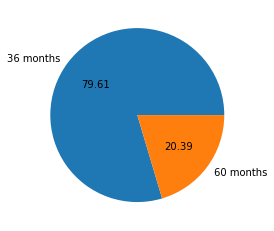

In [99]:
#Vẽ biểu đồ:
plt.pie(unique_term.values, #Lấy giá trị
        labels=unique_term.index, #hiển thị
        autopct='%.2f')
plt.show()

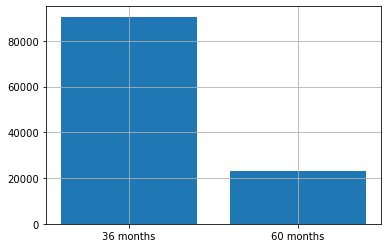

In [104]:
#Vẽ biểu đồ:
plt.bar(unique_term.index,unique_term.values)
plt.grid()
plt.show()

In [105]:
#Xác định giá trị duy nhất trong một cột: purpose
unique_purpose = df_loan['purpose'].value_counts()
unique_purpose

debt_consolidation    63584
credit_card           20858
other                  7750
home_improvement       6824
major_purchase         3572
small_business         2855
car                    2183
wedding                1460
medical                1350
moving                 1056
house                   880
vacation                742
educational             418
renewable_energy        148
Name: purpose, dtype: int64

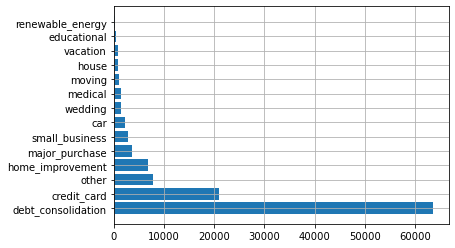

In [106]:
#Vẽ biểu đồ:
plt.barh(unique_purpose.index,unique_purpose.values)
plt.grid()
plt.show()

# THỰC HÀNH 4:
---
**Yêu cầu 4.1:**
1. Đọc dữ liệu từ file Data_Excercise\Data_patient.csv vào biến kiểu dataframe: df_patient với cột feature_1 là cột chỉ số (index_col)
2. Đặt lại tên các cột dữ liệu trong Dataframe: 
    * Feature_1 --> Age
    * Feature_2 --> Gender
    * Feature_3 --> Type
    * Feature_4 --> Blood_pressure
    * Feature_5 --> Cholesterol
    * Feature_6 --> Heartbeat
    * Feature_7 --> Thalassemia
    * Feature_8 --> Result
    
 *Như yêu cầu đã thực hiện trong bài thực hành số 3*

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 4.2:**
Lọc dữ liệu trong df_patient thành các DataFrame:
    * df_male: chứa danh sách bệnh nhân Nam
    * df_female: chứa danh sách bệnh nhân nữ
    * df_no: danh sách những người không bị bệnh đau tim
    * df_yes: danh sách những người bị bệnh đau tim

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 4.3:**
Lọc trong df_patient dưa ra danh sách bệnh nhân thỏa mãn yêu cầu sau:
1. Những người bị mắc bệnh đau tim và trên 70 tuổi
2. Người có giới tính Female, có huyết áp trên 170 mmhg nhưng không bị bệnh đau tim.
3. Những người có triệu chứng đau ngực là Typical angina, giới tính Male và bị bệnh đau tim.

In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 4.4:** Xác định:
1. Chỉ số huyết áp (Blood_pressure) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu
2. Chỉ số nhịp tim (Heartbeat) thấp nhất, cao nhất, trung bình, trung vị và độ lệch chuẩn của tập dữ liệu


In [ ]:
#{HỌC VIEN VIẾT CODE VÀO ĐÂY}







**Yêu cầu 4.5: Xác định:**
1. Số giá trị khác nhau của thuộc tính Type
2. Vẽ đồ thị dạng cột thể hiện kết quả thống kê số lượng theo từng giá trị khác nhau của thuộc tính Type


In [ ]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}





